SVM

In [ ]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('TCS.csv')
df
len(df)

4139

In [ ]:
df.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
df.head()

,date,Symbol,Series,Prev Close,open,high,low,Last,close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [ ]:
df.isnull().sum()

date                     0
Symbol                   0
Series                   0
Prev Close               0
open                     0
high                     0
low                      0
Last                     0
close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().any()

date                  False
Symbol                False
Series                False
Prev Close            False
open                  False
high                  False
low                   False
Last                  False
close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                False
Deliverable Volume    False
%Deliverble           False
dtype: bool

In [ ]:
df.shape

(2456, 15)

In [ ]:
closedf = df['close']
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2456,)


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2456, 1)


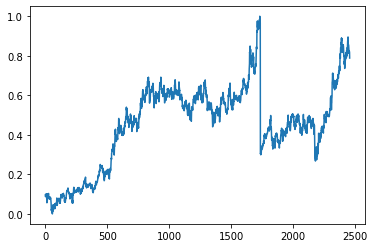

In [ ]:
plt.plot(closedf)

In [ ]:
training_size=int(len(closedf)*0.85)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2087, 1)
test_data:  (369, 1)


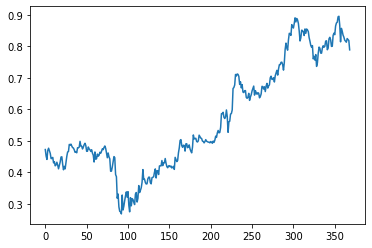

In [ ]:
plt.plot(test_data)

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2071, 15)
y_train:  (2071,)
X_test:  (353, 15)
y_test (353,)


In [ ]:
from sklearn import svm

In [ ]:
clf=svm.SVR()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print (accuracy)

0.9523253255808312


In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [ ]:
# Lets Do the prediction

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (2071, 1)
Test data prediction: (353, 1)


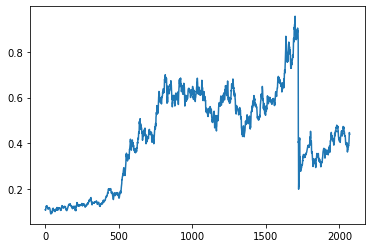

In [ ]:
plt.plot(train_predict)

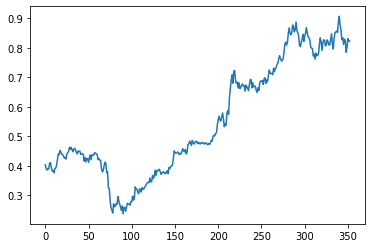

In [ ]:
plt.plot(test_predict)

In [ ]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  96.0934413729835
Train data MSE:  9233.949474903018
Test data MAE:  72.49479393501784
-------------------------------------------------------------------------------------
Test data RMSE:  96.80385553917753
Test data MSE:  9370.986447249952
Test data MAE:  81.04201801180564


In [ ]:
from sklearn.metrics import r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9702897261976177
Test data R2 score: 0.9564449465755102


In [ ]:
df6 = pd.DataFrame({'Actual': original_ytrain.flatten(), 'Predicted' : train_predict.flatten()})
print(df6)

       Actual    Predicted
0     1083.50  1213.597607
1     1097.00  1206.227476
2     1137.75  1210.096422
3     1150.60  1218.463901
4     1154.00  1220.979092
...       ...          ...
2066  2252.80  2047.348213
2067  2269.65  2080.082403
2068  2200.90  2118.873191
2069  2193.95  2106.899280
2070  2201.85  2097.344438

[2071 rows x 2 columns]


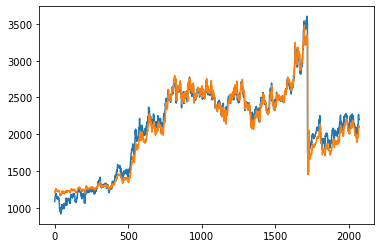

In [ ]:
plt.plot(df6)

In [ ]:
df65= pd.DataFrame({'Actual': original_ytest.flatten(), 'Predicted' : test_predict.flatten()})
print(df65)

      Actual    Predicted
0    2053.25  2001.819746
1    2021.05  1969.756482
2    2051.00  1953.972324
3    2078.50  1966.371281
4    2121.30  1964.346073
..       ...          ...
348  3109.50  3027.113582
349  3100.80  3075.139633
350  3132.00  3151.696980
351  3124.10  3129.065365
352  3115.25  3128.666512

[353 rows x 2 columns]


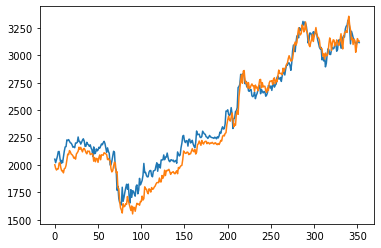

In [ ]:
plt.plot(df65)

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]
